# Data Cleaning

Data Cleaning step is formed by 9 steps/sections as folllows;
1. <a href='#unnecessary_data_section'><b>Unnecessary Data</b></a>
2. <a href='#duplicate_data_section'><b>Duplicate Data</b></a>
3. <a href='#data_types_section'><b>Data Types</b></a>
4. <a href='#typo_section'><b>Typo</b></a>
5. <a href='#missing_data_section'><b>Missing Data</b></a>
6. <a href='#outlier_section'><b>Outlier</b></a>
7. <a href='#common_proper_terminology_section'><b>Common Proper Terminology</b></a>
8. <a href='#re_naming_section'><b>Re-Name</b></a>
9. <a href='#format_section'><b>Format</b></a>

---

## Data Read

In [1]:
# Import necessary libraries for data obtaining
import pandas as pd

In [2]:
raw_data = pd.read_csv('HTRU_2.csv', header=None)

---

<a id='unnecessary_data_section'></a>
## 1. Unnecessary Data

Unnecessary data in the dataset is checked and if there is any they are removed from the dataset in this section.

In [3]:
raw_data.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


There are 9 features in the dataset and they are all related with the problem. Among these features, 8 features(column 0 to 7) are continuous and only 1 feature(column 8) has categorical data.

<a id='duplicate_data_section'></a>
## 2. Duplicate Data

Duplicate data in the dataset is checked and if there is any they are removed from the dataset in this section.

In [4]:
# Duplicated data detection
raw_data[raw_data.duplicated(keep=False)]

,0,1,2,3,4,5,6,7,8


In [5]:
raw_data.shape

(17898, 9)

There is no duplicated data.

<a id='data_types_section'></a>
## 3. Data Types

Data types of the values in the dataset is checked and if there is a improper data type, then it is changed with the proper data type in this section.

In [6]:
raw_data.head(2)

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


In [7]:
raw_data.dtypes

0    float64
1    float64
2    float64
3    float64
4    float64
5    float64
6    float64
7    float64
8      int64
dtype: object

Data types of the features seems compatible with the context.

<a id='typo_section'></a>
## 4. Typo

Dataset is checked if there is any typo and if there is some kind of typo, then it is corrected in this section.<br>
One of consideration is the columns that have Object data type. Since, the Object data type values can have both numerical and non-numerical values.

In [8]:
# For guidance, data types of the suspicious columns can be controlled with .unique() function
# If there is inconsistency between data type of the column(s) and the unique values in the column(s), 
# then there is probably a problem

It seems there is no typo. Since, there is no object column and all columns have either float or integer data type.

<a id='missing_data_section'></a>
## 5. Missing Data

Missing data in the dataset is checked. There is two main way to deal with the missing data as removing entire row/column or filling with the proper data. 
In the filling way, there is some applied methods such as mean value of the feature can be used to fill the missing data in continious case, and another way is using the most used(higher frequency) categorical value to fill the missing data.

In [9]:
raw_data.isna().value_counts()

0      1      2      3      4      5      6      7      8    
False  False  False  False  False  False  False  False  False    17898
dtype: int64

It seems there is no missing data.

<a id='outlier_section'></a>
## 6. Outlier

Outliers in the dataset is checked and if reliability and validity of the dataset is effected by those outliers, then these outliers are removed from the dataset. <br>
In the Outliers concept, numerical columns will be considered with the column' s feature context. Therefore, negativity, positivity and neutrality properties will be considered as well as amount of the feature's numerical content.

In [10]:
# Negativity check on the numerical columns
# Some negative values might be caused from the outliers in the dataset if the column is expected as positive numbers


In [11]:
# Scatter plot might help to detect outliers intuitively
import seaborn as sns
import matplotlib.pyplot as plt

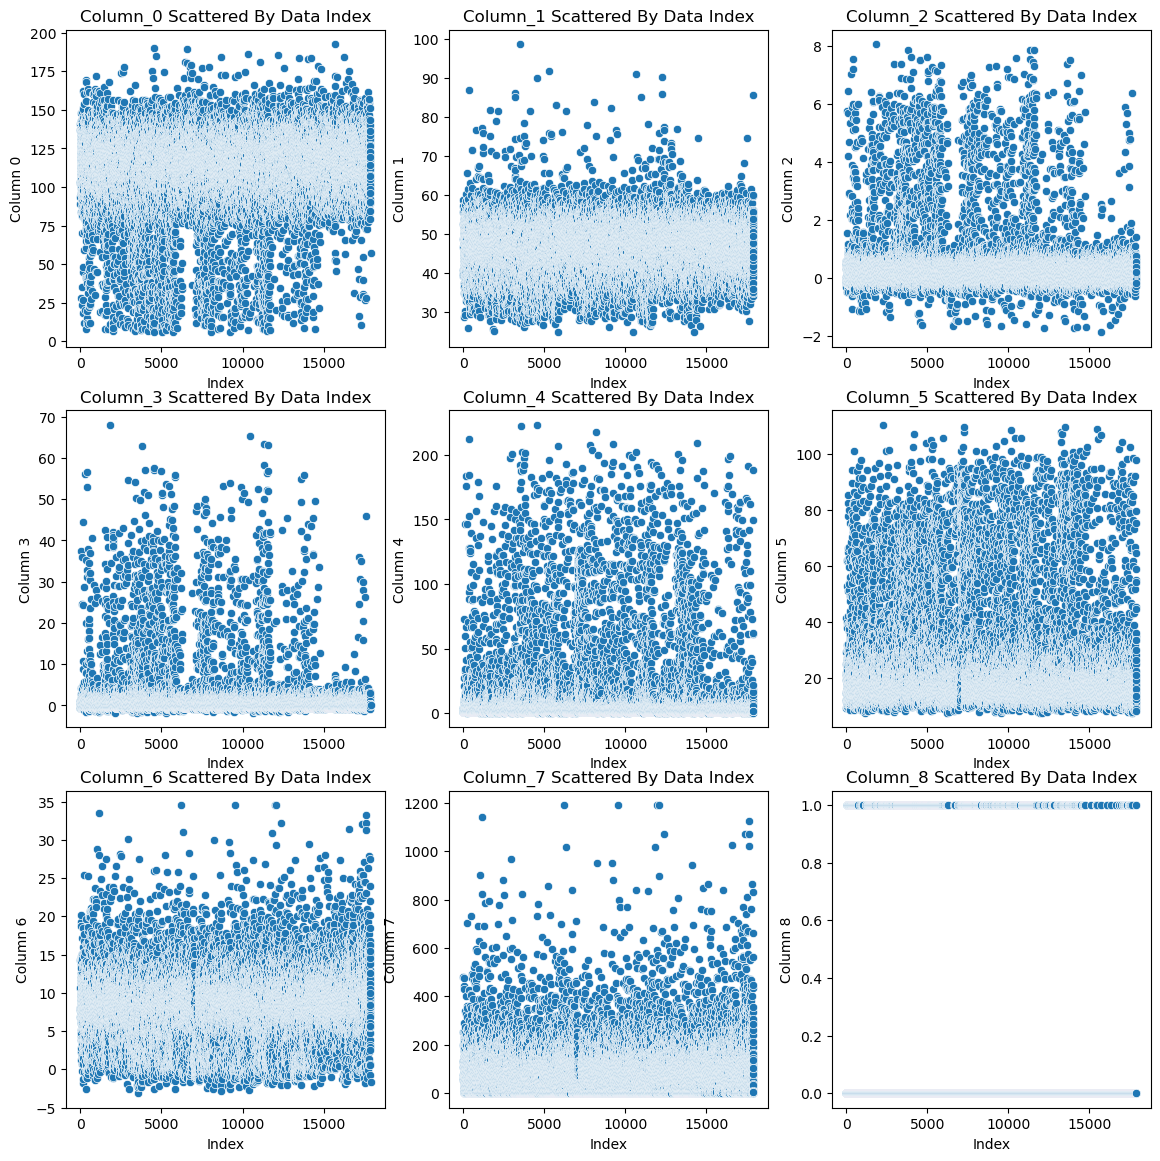

In [12]:
plt.figure(figsize=(14,14))
for i in range(0,len(raw_data.columns)):
    plt.subplot(3,3,i+1)
    fgr = sns.scatterplot(data=raw_data, x=raw_data.index, y=i)
    fgr.set(xlabel='Index', ylabel='Column '+str(i), title='Column_'+str(i)+' Scattered By Data Index')

There are some suspicious values such as in the 1st, 3rd, 6th and 7th columns. They must be further investigated at the following stages. Also, there are negative values but they are data related.

<a id='common_proper_terminology_section'></a>
## 7. Common Proper Terminology

If there is different expressions that represents the same thing, then these different expressions are changed with the only only one common and proper expression. Thus, a common and proper terminology requirement in the dataset is satisfied.

In [13]:
# Check the data set ain aspect of their unique values. If the unique some values refer to same thing, 
# then change them with a common proper terminology
raw_data.head()

,0,1,2,3,4,5,6,7,8
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


There is no data that can be changed with a common proper terminology.

---

<a id='re_naming_section'></a>
## 8. Re-Name

There could be some removed raws and columns. Therefore, in order to keep integrity of the dataset, index and column numbers/names might be needed to changed. Thus, re-indexing and column name arranging is made.

In [14]:
# There are no dropped data in the dataset. 
# However, column names will be renamed with the proper names
raw_data= raw_data.rename(columns={0:'i_p_mean', 1:'i_p_standard_deviation', 2:'i_p_kurtosis', 3:'i_p_skeweness', \
                                   4:'DM_SNR_mean', 5:'DM_SNR_standard_deviation', 6:'DM_SNR_kurtosis', 7:'DM_SNR_skeweness', \
                                   8:'PULSAR'})

In [15]:
raw_data.head(2)

,i_p_mean,i_p_standard_deviation,i_p_kurtosis,i_p_skeweness,DM_SNR_mean,DM_SNR_standard_deviation,DM_SNR_kurtosis,DM_SNR_skeweness,PULSAR
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0


Explanation of the column names:<br>
- **i_p_mean**: integrated profile mean
- **i_p_standard_deviation**: integrated profile standard deviation
- **i_p_kurtosis**: integrated profile excess kurtosis
- **i_p_skeweness**: integrated profile skeweness
- **DM_SNR_mean**: DM-SNR curve mean
- **DM_SNR_standard_deviation**: DM-SNR curve standard deviation
- **DM_SNR_kurtosis**: DM-SNR curve excess kurtosis
- **DM_SNR_skeweness**: DM-SNR curve skeweness
- **PULSAR**: Is the instance a Pulsar star? (1 for yes, and 0 for no)

<a id='format_section'></a>
## 9. Format

Data is cleaned so far. Hence, the dataset is stored with the proper file formatting in this section.

In [16]:
raw_data.to_csv('Pulsar_Classification_Cleaned_Data.csv', index=False)

---